rmse (unscaled):
0.687111151629689 (RandomForestRegressor)
0.8123086554972423 (LinearRegression)
0.8141615403447382 (Ridge)
0.9255803421282806 (Lasso)
0.9242810596011943 (ElasticNet) 

rmse scaled:
0.8092835779827245 (SGDRegressor) 

PolynomialFeatures (rmse):
0.7767527799590593 (Pipeline)
0.7767527799590593 (without Pipeline)


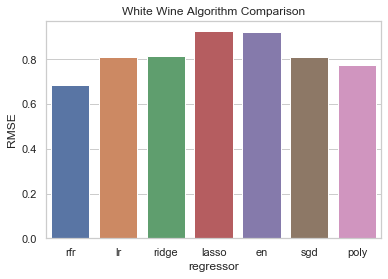

In [2]:
import numpy as np, pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,\
     Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt, seaborn as sns

def get_scores(model, Xtest, ytest):
    y_pred = model.predict(Xtest)
    return np.sqrt(mean_squared_error(ytest, y_pred)),\
           model.__class__.__name__

if __name__ == "__main__":
    br = '\n'
    d = dict()
    X = np.load('data/X_white.npy')
    y = np.load('data/y_white.npy')
    X_train, X_test, y_train, y_test =  train_test_split(
        X, y, test_size=0.2, random_state=0)
    print ('rmse (unscaled):')
    rfr = RandomForestRegressor(random_state=0,
                                n_estimators=100)
    rfr.fit(X_train, y_train)
    rmse, rfr_name = get_scores(rfr, X_test, y_test)
    d['rfr'] = [rmse]
    print (rmse, '(' + rfr_name + ')')
    lr = LinearRegression().fit(X_train, y_train)
    rmse, lr_name = get_scores(lr, X_test, y_test)
    d['lr'] = [rmse]
    print (rmse, '(' + lr_name + ')')
    ridge = Ridge(random_state=0).fit(X_train, y_train)
    rmse, ridge_name = get_scores(ridge, X_test, y_test)
    d['ridge'] = [rmse]
    print (rmse, '(' + ridge_name + ')')
    lasso = Lasso(random_state=0).fit(X_train, y_train)
    rmse, lasso_name = get_scores(lasso, X_test, y_test)
    d['lasso'] = [rmse]
    print (rmse, '(' + lasso_name + ')')
    en = ElasticNet(random_state=0).fit(X_train, y_train)
    rmse, en_name = get_scores(en, X_test, y_test)
    d['en'] = [rmse]
    print (rmse, '(' + en_name + ')', br)
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.fit_transform(X_test)
    print ('rmse scaled:')
    sgd = SGDRegressor(max_iter=1000, tol=0.001,
                       random_state=0)
    sgd.fit(X_train_std, y_train)
    rmse, sgd_name = get_scores(sgd, X_test_std, y_test)
    d['sgd'] = [rmse]
    print (rmse, '(' + sgd_name + ')', br)
    pipe = Pipeline([('poly', PolynomialFeatures(degree=2)),
                     ('linear', LinearRegression())])
    model = pipe.fit(X_train, y_train)
    rmse, pf_name = get_scores(model, X_test, y_test)
    d['poly'] = [rmse]
    print (PolynomialFeatures().__class__.__name__,
           '(rmse):')
    print (rmse, '(' + pf_name + ')')
    poly = PolynomialFeatures(degree=2)
    poly.fit(X_train, y_train)
    X_train_poly = poly.transform(X_train)
    lr = LinearRegression().fit(X_train_poly, y_train)
    X_test_poly = poly.transform(X_test)
    rmse, lr_name = get_scores(lr, X_test_poly, y_test)
    print (rmse, '(without Pipeline)')
    algo, rmse = [], []
    for key, value in d.items():
        algo.append(key)
        rmse.append(value[0])
    plt.figure('RMSE')
    sns.set(style="whitegrid")
    ax = sns.barplot(algo, rmse)
    plt.title('White Wine Algorithm Comparison')
    plt.xlabel('regressor')
    plt.ylabel('RMSE')
    plt.show()